In [1]:
import numpy as np
from PIL import Image
from matplotlib.image import imread
import matplotlib.pyplot as plt

img = Image.open('a1_q5_pic.png')

Part (a):

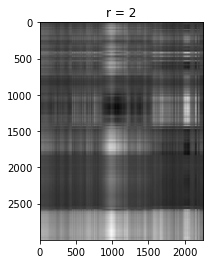

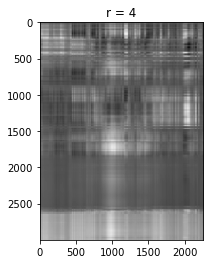

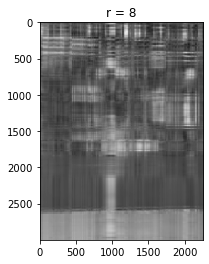

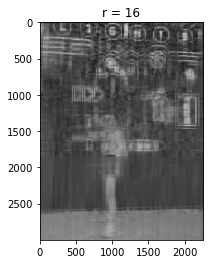

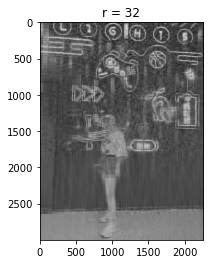

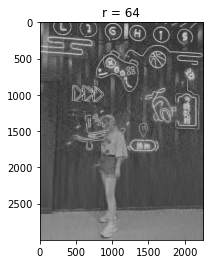

In [2]:
# load image and turn it into grayscale
img1 = img.convert('LA')

# Transfer to numpy matrix
A = np.array(list(img1.getdata(band=0)), float)
A.shape = (img1.size[1], img1.size[0])
A = np.matrix(A)

# SVD
U, sig, V = np.linalg.svd(A)

for r in (2, 4, 8, 16, 32, 64):
    new_A = np.matrix(U[:, :r]) * np.diag(sig[:r]) * np.matrix(V[:r, :])
    plt.imshow(new_A, cmap='gray')
    title = "r = %s" % r
    plt.title(title)
    plt.show()

Part (b):
From the graph, we seems not need a huge r, since it has already worked well when r is less than 500. 
Therefore, it saves much more storage compared to the original picture. 

<function matplotlib.pyplot.show(*args, **kw)>

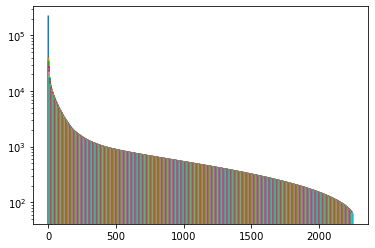

In [3]:
# x-axis is r and y-axis is log(sigma)
plt.figure(1)
plt.semilogy(np.diag(sig))
plt.show

Part (c): 

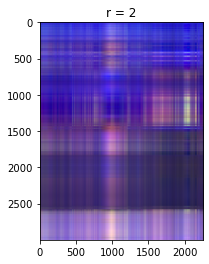

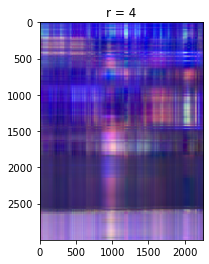

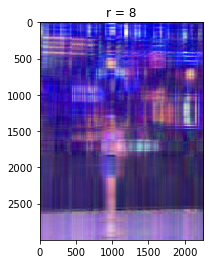

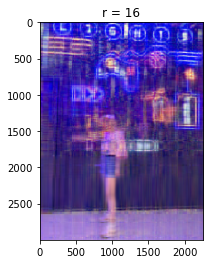

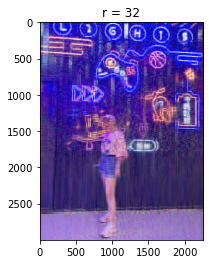

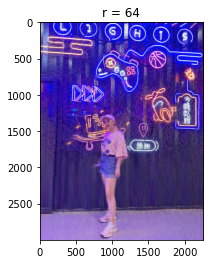

In [4]:
img2 = np.array(img)

# Divide by color RGB
r = img2[:,:,0]
g = img2[:,:,1]
b = img2[:,:,2]

ur, sr, vr = np.linalg.svd(r)
ug, sg, vg = np.linalg.svd(g)
ub, sb, vb = np.linalg.svd(b)

B = np.zeros(img2.shape)

for r in (2, 4, 8, 16, 32, 64):
    B[:,:,0] = np.dot(ur[:,:r],np.dot(np.diag(sr[:r]), vr[:r,:]))
    B[:,:,1] = np.dot(ug[:,:r],np.dot(np.diag(sg[:r]), vg[:r,:]))
    B[:,:,2] = np.dot(ub[:,:r],np.dot(np.diag(sb[:r]), vb[:r,:]))
    for a, row in enumerate(B):
        for b, col in enumerate(row):
            for c, value in enumerate(col):
                if value < 0:
                    B[a,b,c] = abs(value)
                if value > 255:
                    B[a,b,c] = 255
    plt.imshow(B.astype(np.uint8))
    title = "r = %s" % r
    plt.title(title)
    plt.show()